In [348]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

sns.set(style="whitegrid")

In [349]:
df = pd.read_csv("hotel_bookings.csv")

In [350]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [351]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [352]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [353]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [354]:
df.shape

(119390, 32)

In [355]:
df = df.drop_duplicates() #Data had many duplicate values which now has been cleaned.

In [356]:
df.shape

(87396, 32)

In [357]:
df.isnull().sum().sort_values(ascending=False)

company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights                  0


In [358]:
df=df.drop(columns='company')#company column will be dropped because has many null values

In [359]:
nan_replacements = {"children": 0.0,"country": "Unknown", "agent": 0}

In [360]:
df.fillna(nan_replacements, inplace = True)  #replace all null values with 0 

In [361]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

In [362]:
corr = df.corr()
corr

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
is_canceled,1.000000,0.184806,0.088030,0.001443,0.005328,0.060191,0.082928,0.081816,0.067369,-0.020543,-0.089643,0.051468,-0.052154,-0.093644,-0.000900,0.004464,0.127986,-0.184206,-0.120545
lead_time,0.184806,1.000000,0.139135,0.101150,0.009866,0.235145,0.310129,0.140493,0.028650,-0.003614,-0.147003,0.005375,-0.078931,0.077028,0.080448,0.132152,0.023564,-0.086541,0.034240
arrival_date_year,0.088030,0.139135,1.000000,-0.514228,-0.010023,0.005144,0.003645,0.038619,0.041158,-0.023334,0.024343,-0.054212,0.027256,0.008604,-0.001891,-0.027939,0.176088,-0.039807,0.064268
arrival_date_week_number,0.001443,0.101150,-0.514228,1.000000,0.093594,0.026868,0.027801,0.024362,0.013450,0.014260,-0.036860,0.007199,-0.020819,0.011902,0.019594,0.013843,0.098279,0.008946,0.046599
arrival_date_day_of_month,0.005328,0.009866,-0.010023,0.093594,1.000000,-0.017803,-0.028190,-0.001125,0.015821,-0.000393,-0.004178,-0.008538,0.000152,0.006307,0.006102,0.006588,0.022591,0.009167,-0.001651
stays_in_weekend_nights,0.060191,0.235145,0.005144,0.026868,-0.017803,1.000000,0.555552,0.088284,0.028561,0.013668,-0.106948,-0.020636,-0.056653,0.050316,0.158389,-0.031680,0.038972,-0.042920,0.032396
stays_in_week_nights,0.082928,0.310129,0.003645,0.027801,-0.028190,0.555552,1.000000,0.095577,0.030479,0.016009,-0.113543,-0.018781,-0.058503,0.085044,0.190041,0.001905,0.053298,-0.044303,0.037823
adults,0.081816,0.140493,0.038619,0.024362,-0.001125,0.088284,0.095577,1.000000,0.023712,0.016640,-0.171714,-0.042097,-0.120914,-0.048061,0.029627,-0.015740,0.248999,0.007802,0.112772
children,0.067369,0.028650,0.041158,0.013450,0.015821,0.028561,0.030479,0.023712,1.000000,0.017423,-0.045651,-0.019208,-0.029423,0.031313,0.042034,-0.020419,0.326293,0.036332,0.044596
babies,-0.020543,-0.003614,-0.023334,0.014260,-0.000393,0.013668,0.016009,0.016640,0.017423,1.000000,-0.012977,-0.005395,-0.009193,0.081035,0.028949,-0.006840,0.023446,0.030885,0.094820


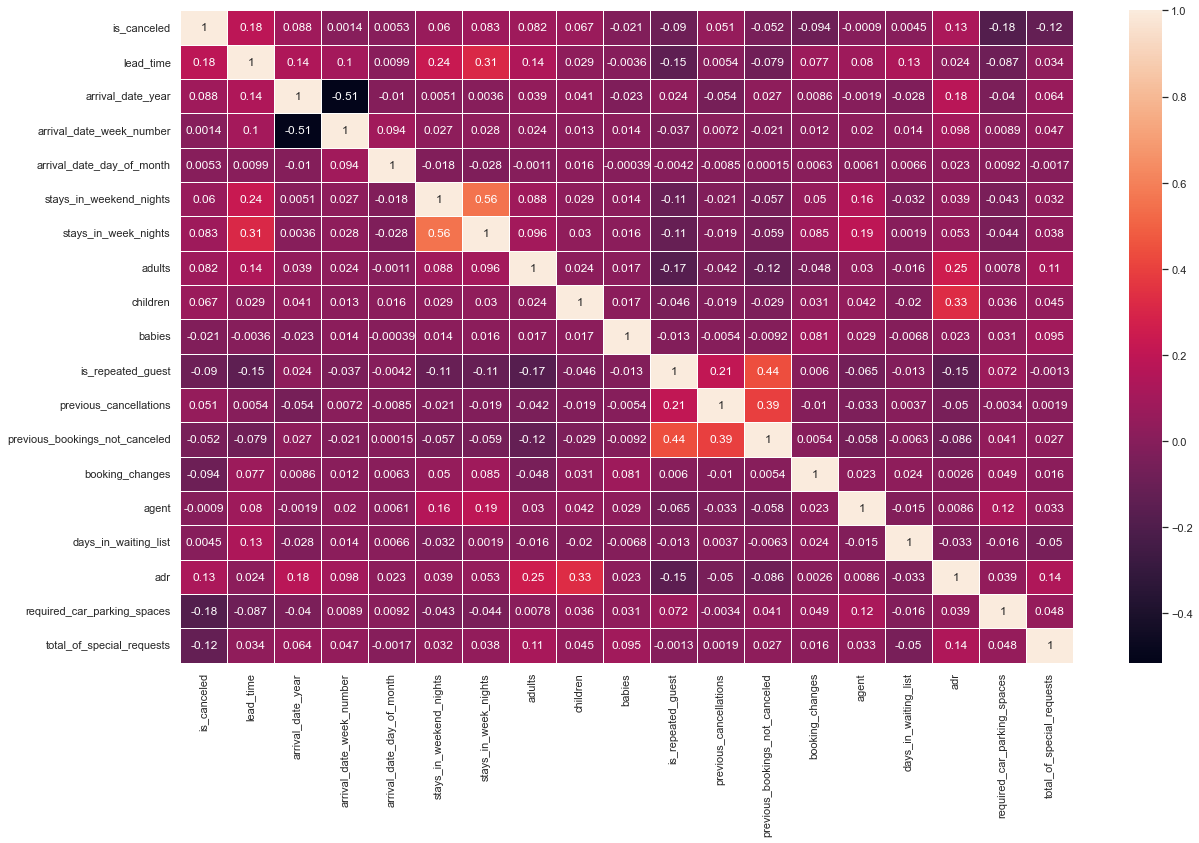

In [363]:
plt.figure(figsize = (20, 12))
sns.heatmap(corr, annot = True, linewidths = 1)
plt.show()

In [364]:
df['hotel'].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [365]:
df['arrival_date_month'].unique()

array(['July', 'August', 'September', 'October', 'November', 'December',
       'January', 'February', 'March', 'April', 'May', 'June'],
      dtype=object)

In [366]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [367]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [368]:
df['reservation_status'].unique()

array(['Check-Out', 'Canceled', 'No-Show'], dtype=object)

In [369]:
df['assigned_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'I', 'B', 'H', 'P', 'L', 'K'],
      dtype=object)

In [370]:
#From where the most guests are coming ?
Guests_per_country = df[df['is_canceled'] == 0]['country'].value_counts().reset_index()
Guests_per_country.columns = ['Country', 'Number_of_guests']
Guests_per_country 

,Country,Number_of_guests
0,PRT,17662
1,GBR,8448
2,FRA,7104
3,ESP,5390
4,DEU,4334
...,...,...
161,ZMB,1
162,SYC,1
163,MDG,1
164,SMR,1


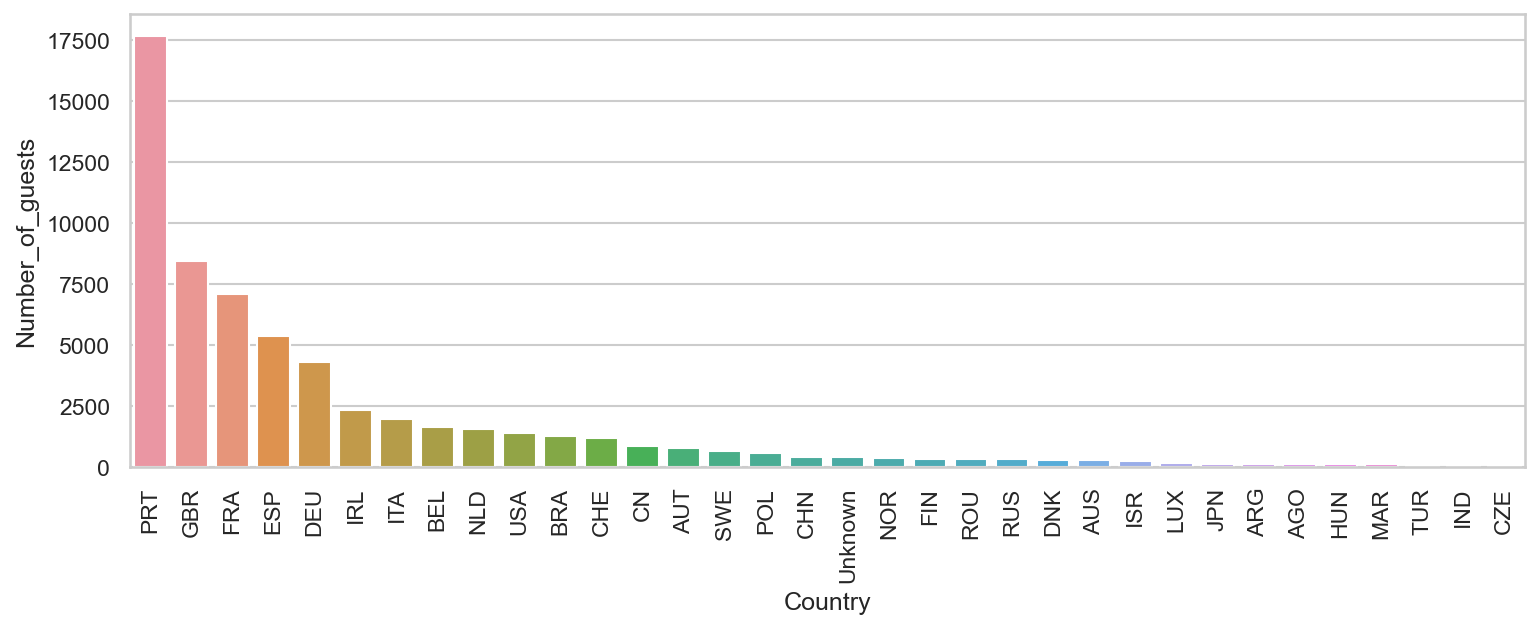

In [371]:
Guests_per_country = Guests_per_country[Guests_per_country['Number_of_guests'] > 100]
fig = plt.figure(figsize=(12,4), dpi=150)
sns.barplot(data=Guests_per_country, x = 'Country', y = 'Number_of_guests')
plt.xticks(rotation=90,fontsize=11);

In [372]:
#Which are the most busy months?

data_resort = df[(df['hotel'] == 'Resort Hotel') & (df['is_canceled'] == 0)]
data_city = df[(df['hotel'] == 'City Hotel') & (df['is_canceled'] == 0)]

In [373]:
resort_guests_monthly= data_resort['arrival_date_month'].value_counts().reset_index()
resort_guests_monthly.columns=['Month','Number of resort guests']
resort_guests_monthly

,Month,Number of resort guests
0,August,3153
1,July,3013
2,May,2246
3,October,2211
4,March,2192
5,April,2169
6,February,2053
7,June,1927
8,September,1875
9,November,1745


In [374]:
city_guests_monthly = data_city['arrival_date_month'].value_counts().reset_index()
city_guests_monthly.columns=['Month','Number of city guests']
city_guests_monthly

,Month,Number of city guests
0,August,4481
1,July,3846
2,May,3667
3,March,3491
4,June,3484
5,April,3330
6,September,3173
7,October,3081
8,February,2630
9,November,2196


In [375]:
final_guests = resort_guests_monthly.merge(city_guests_monthly,on='Month')
final_guests.columns=['Month','no_of_guests_in_resort','no_of_guest_in_city_hotel']
final_guests

,Month,no_of_guests_in_resort,no_of_guest_in_city_hotel
0,August,3153,4481
1,July,3013,3846
2,May,2246,3667
3,October,2211,3081
4,March,2192,3491
5,April,2169,3330
6,February,2053,2630
7,June,1927,3484
8,September,1875,3173
9,November,1745,2196


In [376]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [377]:
final_guests = sort_month(final_guests,'Month')
final_guests

,Month,no_of_guests_in_resort,no_of_guest_in_city_hotel
0,January,1689,1966
1,February,2053,2630
2,March,2192,3491
3,April,2169,3330
4,May,2246,3667
5,June,1927,3484
6,July,3013,3846
7,August,3153,4481
8,September,1875,3173
9,October,2211,3081


/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1949050189.py:5: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([l1 ,l2],labels=["no of guests in resort","no of guest in city hotel"],loc=(.71,.830))


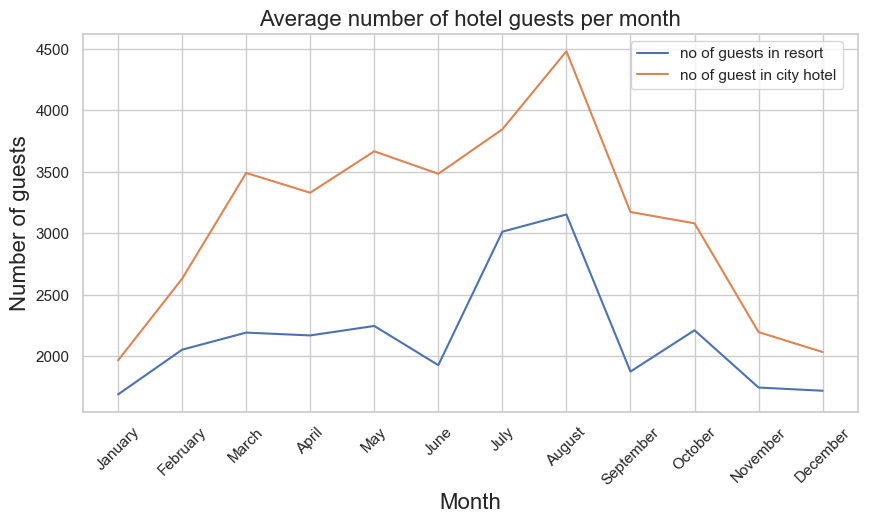

In [378]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

l1 =ax.plot(final_guests.Month, final_guests.no_of_guests_in_resort)
l2 = ax.plot(final_guests.Month, final_guests.no_of_guest_in_city_hotel)
fig.legend([l1 ,l2],labels=["no of guests in resort","no of guest in city hotel"],loc=(.71,.830)) 
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

In [379]:
#How long do people stay at the hotels?
filter = df['is_canceled'] == 0
data1 = df[filter]
data1.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,booking_changes,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,3,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,4,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,0,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,0,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,0,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [380]:
data1['total_nights'] = data1['stays_in_weekend_nights'] + data1['stays_in_week_nights']
data1.head()

/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1674994220.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data1['total_nights'] = data1['stays_in_weekend_nights'] + data1['stays_in_week_nights']


,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,total_nights
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,0.0,0,Transient,0.0,0,0,Check-Out,2015-07-01,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,0.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,0,Transient,75.0,0,0,Check-Out,2015-07-02,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,0,Transient,98.0,0,1,Check-Out,2015-07-03,2


In [381]:
stay = data1.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_canceled':'Number of stays'})
stay

,total_nights,hotel,Number of stays
0,0,City Hotel,271
1,0,Resort Hotel,351
2,1,City Hotel,7986
3,1,Resort Hotel,6037
4,2,City Hotel,7639
...,...,...,...
63,49,City Hotel,1
64,56,Resort Hotel,1
65,57,City Hotel,1
66,60,Resort Hotel,1


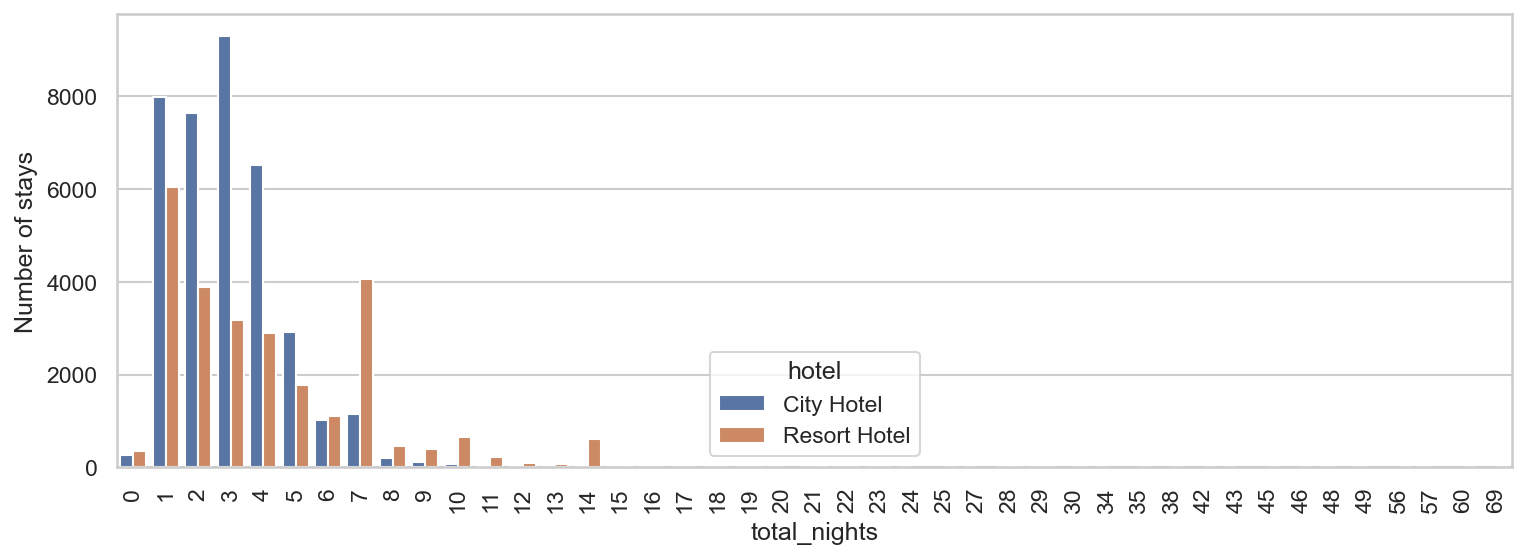

In [382]:
fig = plt.figure(figsize=(12,4), dpi=150)
sns.barplot(data=stay, x = 'total_nights', y = 'Number of stays', hue="hotel")
plt.xticks(rotation=90,fontsize=11);

In [383]:
#Data Prepration
# dropping columns that are not useful
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes','reservation_status','country','days_in_waiting_list'], axis = 1, inplace = True)

In [384]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,previous_cancellations,previous_bookings_not_canceled,reserved_room_type,deposit_type,agent,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
0,Resort Hotel,0,342,July,27,1,0,0,2,0.0,...,0,0,C,No Deposit,0.0,Transient,0.0,0,0,2015-07-01
1,Resort Hotel,0,737,July,27,1,0,0,2,0.0,...,0,0,C,No Deposit,0.0,Transient,0.0,0,0,2015-07-01
2,Resort Hotel,0,7,July,27,1,0,1,1,0.0,...,0,0,A,No Deposit,0.0,Transient,75.0,0,0,2015-07-02
3,Resort Hotel,0,13,July,27,1,0,1,1,0.0,...,0,0,A,No Deposit,304.0,Transient,75.0,0,0,2015-07-02
4,Resort Hotel,0,14,July,27,1,0,2,2,0.0,...,0,0,A,No Deposit,240.0,Transient,98.0,0,1,2015-07-03


In [385]:
# creating categorical dataframes

categorical_col = df.select_dtypes(object).columns
for i in categorical_col:
    print (i, df[i].nunique())  #find the categorical features

hotel 2
arrival_date_month 12
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
reservation_status_date 926


In [386]:
categorical_df = df[categorical_col]
categorical_df.head()

,hotel,arrival_date_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,reservation_status_date
0,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
1,Resort Hotel,July,BB,Direct,Direct,C,No Deposit,Transient,2015-07-01
2,Resort Hotel,July,BB,Direct,Direct,A,No Deposit,Transient,2015-07-02
3,Resort Hotel,July,BB,Corporate,Corporate,A,No Deposit,Transient,2015-07-02
4,Resort Hotel,July,BB,Online TA,TA/TO,A,No Deposit,Transient,2015-07-03


In [387]:
# separate'reservation_status_date' column to three columns year, month and day then drop 'reservation_status_date' column

categorical_df['reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'])

categorical_df['year'] = categorical_df['reservation_status_date'].dt.year
categorical_df['month'] = categorical_df['reservation_status_date'].dt.month
categorical_df['day'] = categorical_df['reservation_status_date'].dt.day

/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1471863724.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['reservation_status_date'] = pd.to_datetime(categorical_df['reservation_status_date'])
/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1471863724.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['year'] = categorical_df['reservation_status_date'].dt.year
/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1471863724.py:

In [388]:
categorical_df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

/Users/malakal-matrafi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [389]:
categorical_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
1,Resort Hotel,BB,Direct,Direct,C,No Deposit,Transient,2015,7,1
2,Resort Hotel,BB,Direct,Direct,A,No Deposit,Transient,2015,7,2
3,Resort Hotel,BB,Corporate,Corporate,A,No Deposit,Transient,2015,7,2
4,Resort Hotel,BB,Online TA,TA/TO,A,No Deposit,Transient,2015,7,3


In [390]:
# printing unique values of each column to encoding
for col in categorical_df.columns:
    print(f"{col}: \n{categorical_df[col].unique()}\n")

hotel: 
['Resort Hotel' 'City Hotel']

meal: 
['BB' 'FB' 'HB' 'SC' 'Undefined']

market_segment: 
['Direct' 'Corporate' 'Online TA' 'Offline TA/TO' 'Complementary' 'Groups'
 'Undefined' 'Aviation']

distribution_channel: 
['Direct' 'Corporate' 'TA/TO' 'Undefined' 'GDS']

reserved_room_type: 
['C' 'A' 'D' 'E' 'G' 'F' 'H' 'L' 'P' 'B']

deposit_type: 
['No Deposit' 'Refundable' 'Non Refund']

customer_type: 
['Transient' 'Contract' 'Transient-Party' 'Group']

year: 
[2015 2014 2016 2017]

month: 
[ 7  5  4  6  3  8  9  1 11 10 12  2]

day: 
[ 1  2  3  6 22 23  5  7  8 11 15 16 29 19 18  9 13  4 12 26 17 10 20 14
 30 28 25 21 27 24 31]



In [391]:
# encoding categorical variables

categorical_df['hotel'] = categorical_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})

categorical_df['meal'] = categorical_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})

categorical_df['market_segment'] = categorical_df['market_segment'].map({'Direct': 0, 'Corporate': 1, 'Online TA': 2, 'Offline TA/TO': 3,
                                                           'Complementary': 4, 'Groups': 5, 'Undefined': 6, 'Aviation': 7})

categorical_df['distribution_channel'] = categorical_df['distribution_channel'].map({'Direct': 0, 'Corporate': 1, 'TA/TO': 2, 'Undefined': 3,
                                                                       'GDS': 4})
categorical_df['reserved_room_type'] = categorical_df['reserved_room_type'].map({'C': 0, 'A': 1, 'D': 2, 'E': 3, 'G': 4, 'F': 5, 'H': 6,
                                                                   'L': 7, 'B': 8, 'P':9})

categorical_df['deposit_type'] = categorical_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 3})

categorical_df['customer_type'] = categorical_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

categorical_df['year'] = categorical_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1487262112.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['hotel'] = categorical_df['hotel'].map({'Resort Hotel' : 0, 'City Hotel' : 1})
/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipykernel_43188/1487262112.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  categorical_df['meal'] = categorical_df['meal'].map({'BB' : 0, 'FB': 1, 'HB': 2, 'SC': 3, 'Undefined': 4})
/var/folders/5p/7kz1v7gx71j9081281cmrjbr0000gn/T/ipyker

In [392]:
categorical_df.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day
0,0,0,0,0,0,0,0,0,7,1
1,0,0,0,0,0,0,0,0,7,1
2,0,0,0,0,1,0,0,0,7,2
3,0,0,1,1,1,0,0,0,7,2
4,0,0,2,2,1,0,0,0,7,3


In [393]:
# creating numerical dataframes
numerical_df = df.drop(columns = categorical_col, axis = 1)
numerical_df.drop('is_canceled', axis = 1, inplace = True)
numerical_df

,lead_time,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
0,342,27,1,0,0,2,0.0,0,0,0,0,0.0,0.00,0,0
1,737,27,1,0,0,2,0.0,0,0,0,0,0.0,0.00,0,0
2,7,27,1,0,1,1,0.0,0,0,0,0,0.0,75.00,0,0
3,13,27,1,0,1,1,0.0,0,0,0,0,304.0,75.00,0,0
4,14,27,1,0,2,2,0.0,0,0,0,0,240.0,98.00,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,35,30,2,5,2,0.0,0,0,0,0,394.0,96.14,0,0
119386,102,35,31,2,5,3,0.0,0,0,0,0,9.0,225.43,0,2
119387,34,35,31,2,5,2,0.0,0,0,0,0,9.0,157.71,0,4
119388,109,35,31,2,5,2,0.0,0,0,0,0,89.0,104.40,0,0


In [394]:
# normalizing numerical variables

numerical_df['lead_time'] = np.log(numerical_df['lead_time'] + 1)
numerical_df['arrival_date_week_number'] = np.log(numerical_df['arrival_date_week_number'] + 1)
numerical_df['arrival_date_day_of_month'] = np.log(numerical_df['arrival_date_day_of_month'] + 1)
numerical_df['agent'] = np.log(numerical_df['agent'] + 1)
numerical_df['adr'] = np.log(numerical_df['adr'] + 1)

/Users/malakal-matrafi/opt/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [395]:
numerical_df['adr'] = numerical_df['adr'].fillna(value = numerical_df['adr'].mean())

In [396]:
np.any(np.isnan(categorical_df))

False

In [397]:
np.any(np.isnan(numerical_df))

False

In [398]:
categorical_df.isnull().sum().sort_values(ascending=False)

hotel                   0
meal                    0
market_segment          0
distribution_channel    0
reserved_room_type      0
deposit_type            0
customer_type           0
year                    0
month                   0
day                     0
dtype: int64

In [399]:
np.all(np.isfinite(categorical_df))

True

In [400]:
np.all(np.isfinite(numerical_df))

True

In [401]:
X = pd.concat([categorical_df, numerical_df], axis = 1)
y = df['is_canceled']

In [402]:
X.shape, y.shape

((87396, 25), (87396,))

In [403]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [404]:
X_train.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
24909,0,0,2,2,2,0,0,2,6,9,...,2,0.0,0,0,0,0,5.488938,4.186316,0,1
21858,0,0,3,2,1,0,0,2,3,12,...,1,0.0,0,0,0,0,5.929589,3.258097,0,0
66320,1,2,2,2,5,0,0,3,4,2,...,2,2.0,0,0,0,0,2.302585,5.645447,0,0
26800,0,0,3,2,1,0,0,2,8,11,...,2,0.0,0,0,0,0,4.574711,4.589041,0,1
111900,1,3,2,2,1,0,0,3,5,17,...,2,0.0,0,0,0,0,2.302585,4.976734,0,0


In [405]:
X_test.head()

,hotel,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,year,month,day,...,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,agent,adr,required_car_parking_spaces,total_of_special_requests
89704,1,0,3,2,1,0,2,2,5,25,...,1,0.0,0,0,0,0,3.091042,4.262680,0,1
59022,1,0,2,2,1,0,0,2,7,11,...,2,0.0,0,0,0,0,2.302585,4.785824,0,0
42574,1,0,2,2,1,0,0,0,9,11,...,2,0.0,0,0,0,0,2.302585,4.912655,0,0
71755,1,3,2,2,1,0,0,2,8,25,...,2,0.0,0,0,0,0,2.302585,4.500920,0,0
92950,1,0,1,1,1,0,0,3,3,6,...,1,0.0,0,1,1,9,0.000000,4.189655,1,0


In [406]:
y_train.head(), y_test.head()

(24909     0
 21858     0
 66320     1
 26800     0
 111900    0
 Name: is_canceled, dtype: int64,
 89704    0
 59022    1
 42574    0
 71755    1
 92950    0
 Name: is_canceled, dtype: int64)

In [407]:
#Model Building
#Logistic Regression

lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Logistic Regression is : 0.8007933178229528
Confusion Matrix : 
[[18290   797]
 [ 4426  2706]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     19087
           1       0.77      0.38      0.51      7132

    accuracy                           0.80     26219
   macro avg       0.79      0.67      0.69     26219
weighted avg       0.80      0.80      0.78     26219



/Users/malakal-matrafi/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [408]:
# K Nearest Neighbors (KNN)
#Determine which value of k is the best 
error_rate = []
for i in range (1,20):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)

    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))



In [409]:
error_rate

[0.14493306380868837,
 0.15221785727907242,
 0.13909760097639118,
 0.15015828216179106,
 0.14069949273427668,
 0.1519890155993745,
 0.1437888554101987,
 0.1532476448377131,
 0.14619169304702698,
 0.15549792135474275,
 0.14981501964224417,
 0.1576337770319234,
 0.15084480720088486,
 0.15904496739006063,
 0.15359090735726,
 0.16091384110759374,
 0.15618444639383652,
 0.16377436210381785,
 0.15839658263091652]

Text(0, 0.5, 'Error Rate')

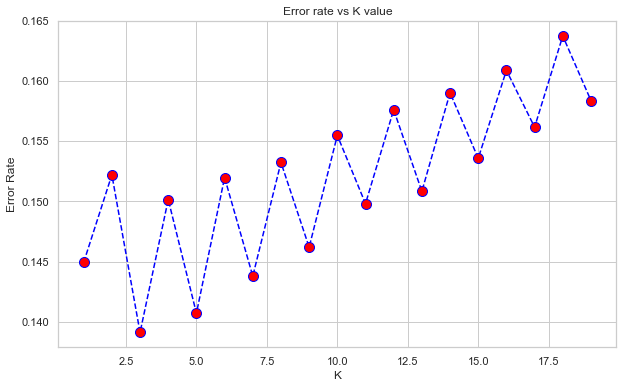

In [411]:
x=range(1,20)
y=error_rate
plt.figure (figsize= (10,6))
plt.plot(x,y,color='blue',linestyle='dashed',marker='o',markerfacecolor='red',markersize=10)
plt.title('Error rate vs K value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [412]:
# K Nearest Neighbors (KNN)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

acc_knn = accuracy_score(y_test, y_pred_knn)
conf = confusion_matrix(y_test, y_pred_knn)
clf_report = classification_report(y_test, y_pred_knn)

print(f"Accuracy Score of KNN is : {acc_knn}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of KNN is : 0.8593005072657234
Confusion Matrix : 
[[18472   615]
 [ 3074  4058]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.86      0.97      0.91     19087
           1       0.87      0.57      0.69      7132

    accuracy                           0.86     26219
   macro avg       0.86      0.77      0.80     26219
weighted avg       0.86      0.86      0.85     26219



In [413]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

acc_dtc = accuracy_score(y_test, y_pred_dtc)
conf = confusion_matrix(y_test, y_pred_dtc)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Accuracy Score of Decision Tree is : {acc_dtc}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")


Accuracy Score of Decision Tree is : 0.9216980052633587
Confusion Matrix : 
[[18055  1032]
 [ 1021  6111]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     19087
           1       0.86      0.86      0.86      7132

    accuracy                           0.92     26219
   macro avg       0.90      0.90      0.90     26219
weighted avg       0.92      0.92      0.92     26219



In [414]:
#Decision Tree Classifier

rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

Accuracy Score of Random Forest is : 0.9351233838056371
Confusion Matrix : 
[[18930   157]
 [ 1544  5588]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.92      0.99      0.96     19087
           1       0.97      0.78      0.87      7132

    accuracy                           0.94     26219
   macro avg       0.95      0.89      0.91     26219
weighted avg       0.94      0.94      0.93     26219

